<a href="https://colab.research.google.com/github/msammons82/UpstartStockEDA/blob/main/Upstart_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import plotly.express as px

  Using cached yfinance-0.1.70-py2.py3-none-any.whl (26 kB)
     |████████████████████████████████| 6.4 MB 7.6 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [6]:
df = yf.download('UPST', start = '2018-01-01', end ='2022-04-10')

[*********************100%***********************]  1 of 1 completed


In [7]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-16,26.000000,30.010000,22.610001,29.469999,29.469999,13459800
2020-12-17,28.643000,39.849998,28.250000,35.770000,35.770000,7042200
2020-12-18,38.020000,48.660000,37.060001,44.090000,44.090000,7266500
2020-12-21,44.000000,47.990002,40.000000,41.099998,41.099998,2833800
2020-12-22,43.099998,48.080002,40.650002,47.840000,47.840000,3727400
...,...,...,...,...,...,...
2022-04-04,110.949997,116.900002,110.306999,113.849998,113.849998,8395800
2022-04-05,113.610001,114.300003,102.410004,103.720001,103.720001,9985500
2022-04-06,101.669998,101.669998,93.750000,97.300003,97.300003,13593100


In [8]:
df['MA200'] = df['Adj Close'].rolling(window = 200).mean()

In [9]:
df['MA200'].dropna()

Date
2021-10-01    129.022475
2021-10-04    130.323975
2021-10-05    131.626625
2021-10-06    132.944675
2021-10-07    134.276075
                 ...    
2022-04-04    184.801274
2022-04-05    184.713124
2022-04-06    184.601374
2022-04-07    184.452174
2022-04-08    184.290924
Name: MA200, Length: 132, dtype: float64

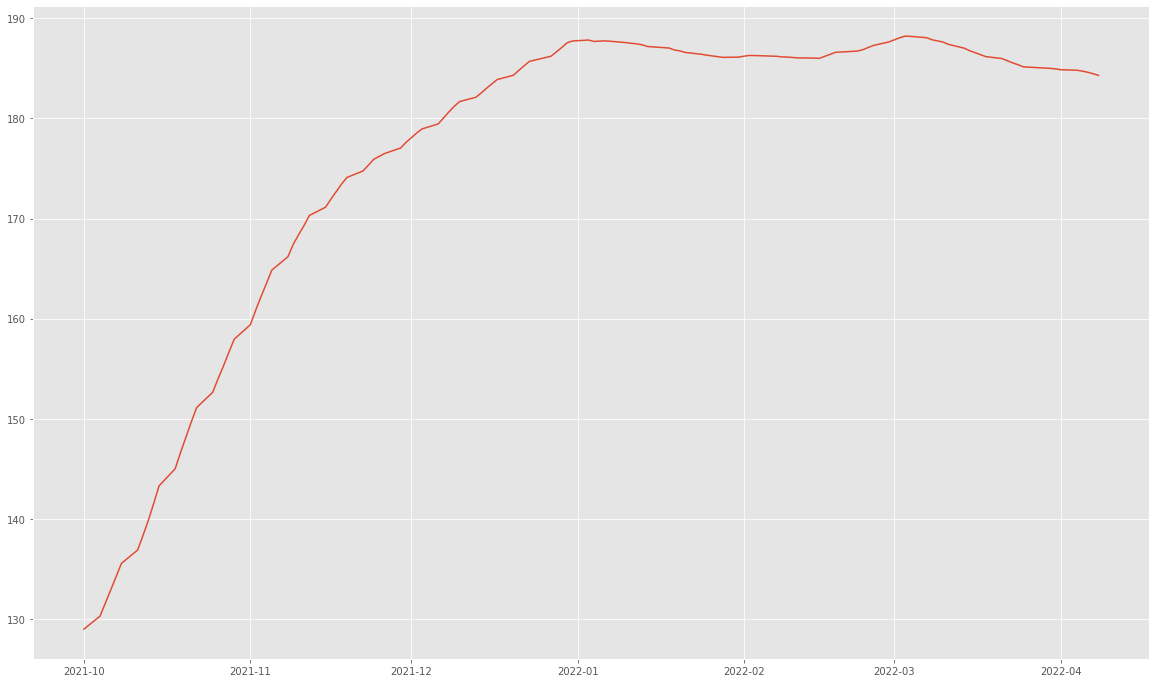

In [14]:
plt.style.use('ggplot')
plt.figure(figsize = (20,12))
plt.plot(df['MA200'])
plt.show()

Text(0.5, 0, 'Volume')

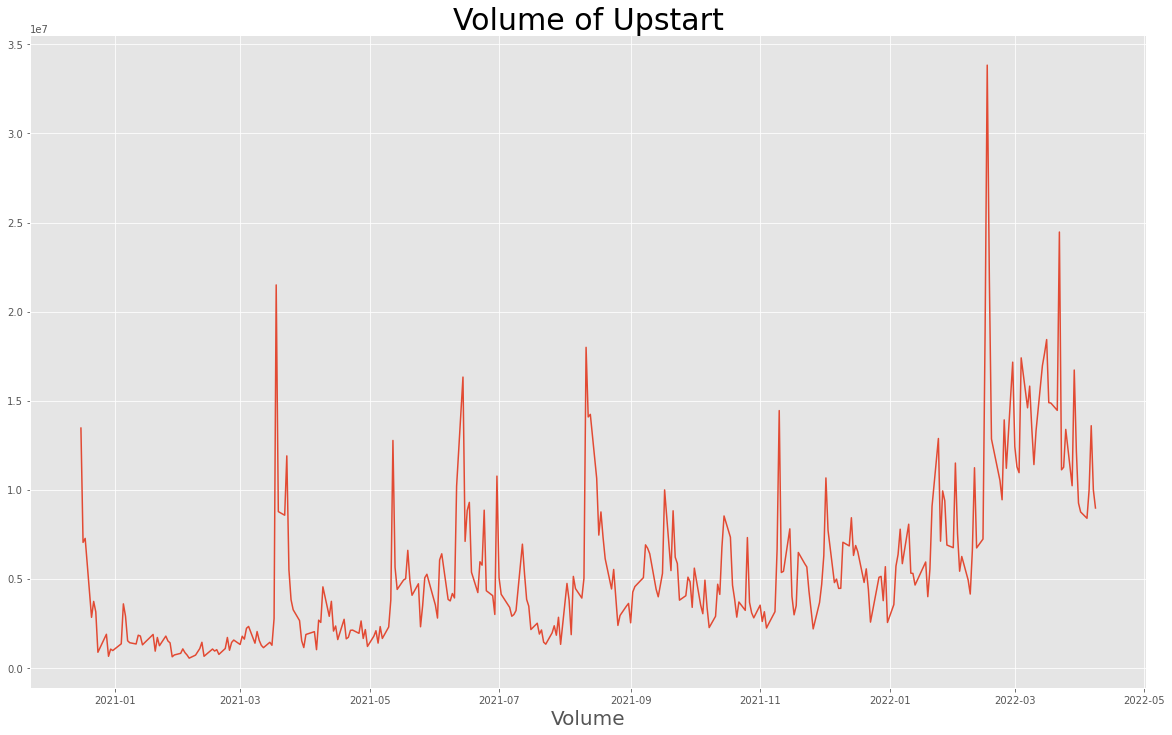

In [16]:
plt.figure(figsize = (20,12))
plt.plot(df['Volume'])
plt.title('Volume of Upstart', fontsize = 30)
plt.xlabel('Volume', fontsize =20)

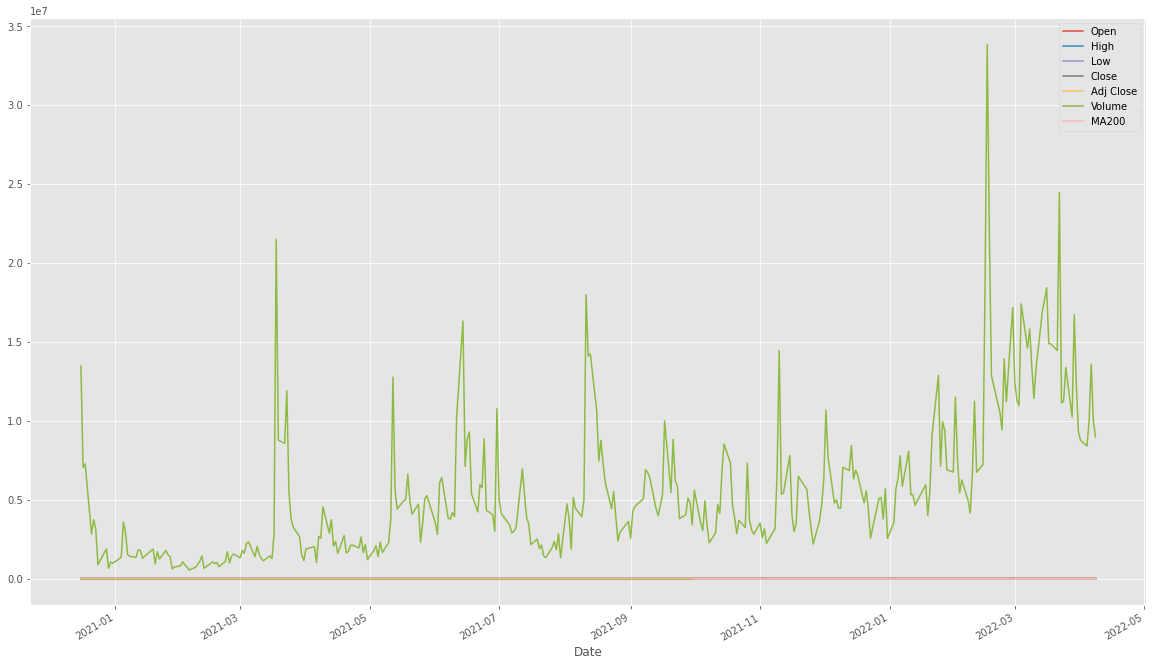

In [17]:
df.plot(figsize = (20,12))

Text(0.5, 1.0, 'Upstart Stock at all time')

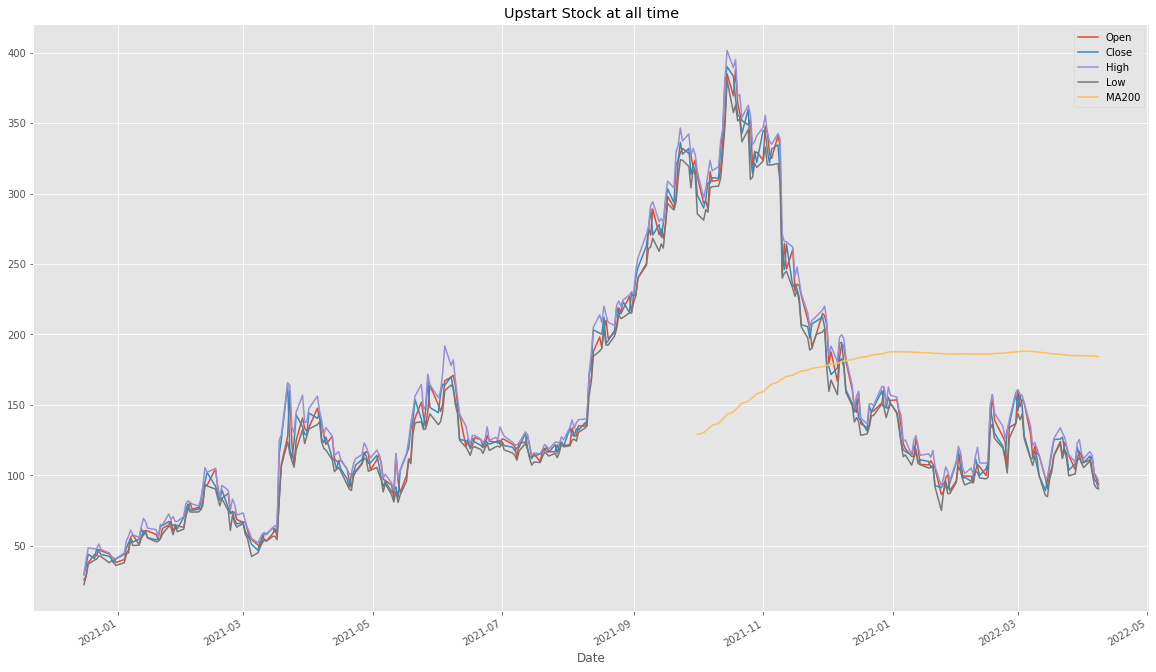

In [19]:
df[['Open','Close', 'High','Low','MA200']].plot(figsize = (20,12))
plt.title('Upstart Stock at all time')


# Dickey-Fuller

In [20]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [21]:
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                  -1.587960
p-value                          0.489639
#Lags Used                       1.000000
Number of Observations Used    329.000000
Critical Value (1%)             -3.450384
Critical Value (5%)             -2.870365
Critical Value (10%)            -2.571472
dtype: float64
None


In [22]:
print(adf_test(df['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                 -2.581513
p-value                         0.096879
#Lags Used                      1.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                 -3.217755
p-value                         0.018980
#Lags Used                      1.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64
None


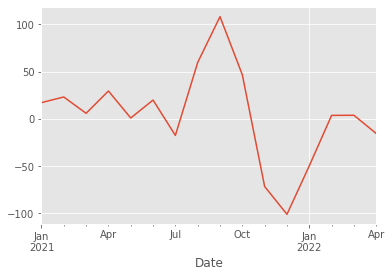

In [24]:
upst_diff = df['Open'].resample('MS').mean() - df['Open'].resample('MS').mean().shift(1)
upst_open_diff = upst_diff.dropna()
upst_open_diff.plot()

print(adf_test(upst_open_diff))

# KPSS

In [25]:
from statsmodels.tsa.stattools import kpss

In [26]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", lags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [27]:
kpss_test(df['High'])

Results of KPSS Test:
Test Statistic            0.859664
p-value                   0.010000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


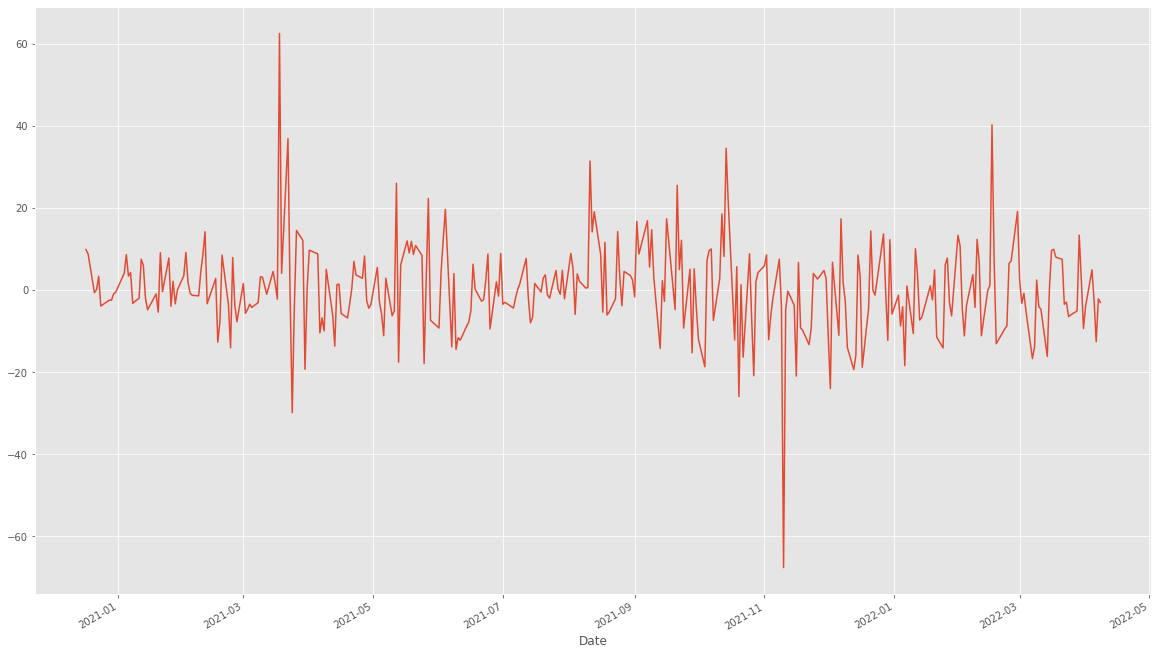

In [28]:
df['High_diff'] = df['High']- df['High'].shift(1)
df['High_diff'].dropna().plot(figsize = (20,12))

In [29]:
kpss_test(df['High_diff'].dropna())

Results of KPSS Test:
Test Statistic           0.319963
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [31]:
kpss_test(df['High_diff'].resample('MS').mean().dropna())

Results of KPSS Test:
Test Statistic           0.268216
p-value                  0.100000
Lags Used                1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [32]:
kpss_test(df['High_diff'].resample('MS').std().dropna())

Results of KPSS Test:
Test Statistic           0.154229
p-value                  0.100000
Lags Used                1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [33]:
adf_test(df['High_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.603972e+01
p-value                        5.932270e-29
#Lags Used                     0.000000e+00
Number of Observations Used    3.290000e+02
Critical Value (1%)           -3.450384e+00
Critical Value (5%)           -2.870365e+00
Critical Value (10%)          -2.571472e+00
dtype: float64


# Data Preprocessing

In [34]:
train_df = df['High'].iloc[:-4]

X_train = []
y_train = []

for i in range(2, len(train_df)):
  X_train.append(train_df[i-2:i])
  y_train.append(train_df[i])

In [35]:
import math
train_len = math.ceil(len(train_df)*0.8)
train_len

262

# For Model and apply RNN + LSTM

In [36]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed
from tensorflow.keras.models import Sequential

In [37]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [38]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
4/4 - 2s - loss: 31843.8770 - 2s/epoch - 491ms/step
Epoch 2/10
4/4 - 0s - loss: 29861.1562 - 17ms/epoch - 4ms/step
Epoch 3/10
4/4 - 0s - loss: 27430.7363 - 23ms/epoch - 6ms/step
Epoch 4/10
4/4 - 0s - loss: 24762.7930 - 19ms/epoch - 5ms/step
Epoch 5/10
4/4 - 0s - loss: 22123.4316 - 17ms/epoch - 4ms/step
E

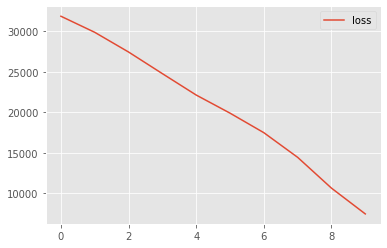

In [39]:
losse = pd.DataFrame(model.history.history)
losse[['loss']].plot()

In [40]:
test_data = train_df[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

In [41]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)

In [42]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy 
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 74.07598456385116
Validation rmse: 47.75490092118599


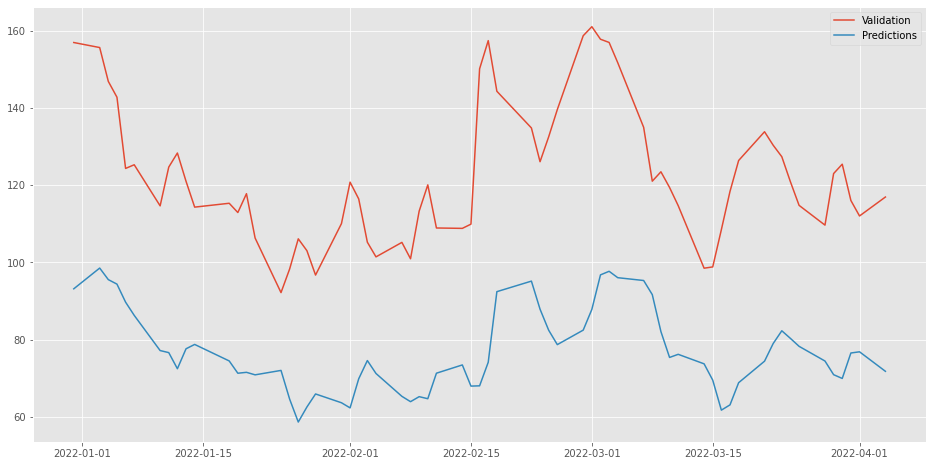

In [43]:
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [44]:
variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,65.000000
mean,46.027825
std,12.825781
min,20.147537
25%,37.465668
50%,44.006989
75%,55.269623
max,83.275131


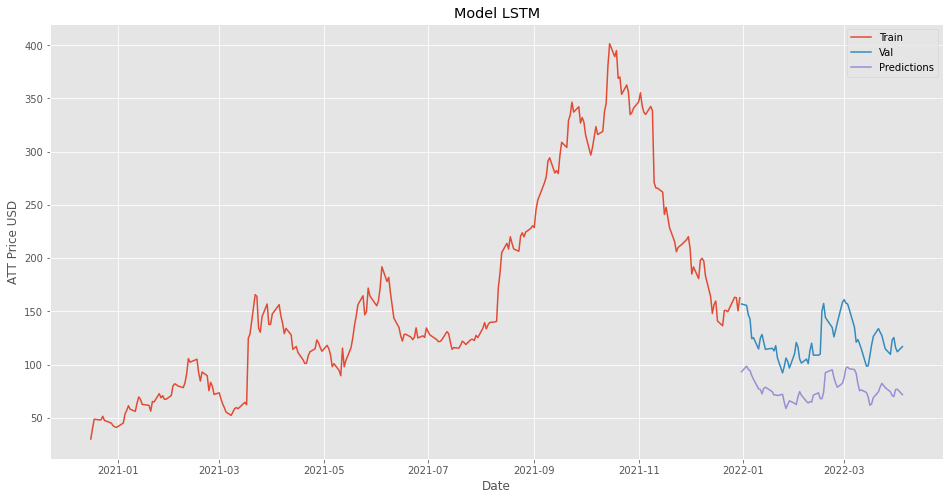

In [45]:
train = train_df[:train_len]
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('ATT Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()